# Predicting Customer Churn - Sci-kit Learn

This notebook uses Python and SKLearn to build a model to predict customer churn based upon 3 datasets
 - Customer Demographics
 - Customer Transactions
 - Customer Churn Flag

Whilst it closely follows the steps within the Modeler Flows section of the lab, it is not an exact replication

## Step 1: Read Individual Data Files in to Pandas Dataframes

#### Note about reading data files into Notebooks in Watson Studio Desktop
Unlike Jupyter notebooks in Watson Studio Cloud and Local, there is no "Insert to code" option within Watson Studio Desktop. Therefore code has to be written by the user to access data files.<br>
- The sample code below shows how to read the data sets from the project.<br>
- Documentation on how to read data in to notebooks can be found at [https://www.ibm.com/support/knowledgecenter/SSBFT6_1.1.0/wsj/analyze-data/load-and-access-data.html](https://www.ibm.com/support/knowledgecenter/SSBFT6_1.1.0/wsj/analyze-data/load-and-access-data.html).<br>

In [145]:
# Load the libraries required to read the data from the WSD project assets

import pandas as pd
from project_lib import Project
project = Project()

In [146]:
# Obtain a list of file names stored within the project assets

filename = project.get_files()
print(filename)

[{'name': 'Churn Data.csv', 'asset_id': 'data_asset.4f7da90f-e949-42fa-8bdd-30a05f12c754'}, {'name': 'Churn Score Results', 'asset_id': 'data_asset.6551d85c-14d8-423a-8923-8a200575648e'}, {'name': 'Transaction Data.csv', 'asset_id': 'data_asset.64030fcf-0bac-4bf7-ab45-eda248316dcc'}, {'name': 'Churn Batch Input Data.csv', 'asset_id': 'data_asset.b7a73b03-c9ef-4e28-a704-19ebc41b35da'}, {'name': 'Demographic Data.csv', 'asset_id': 'data_asset.ccd3b58e-875a-4858-9a84-8f094725b992'}]


In [147]:
# Display the index number for each file in the project data assets

index = 1
for filename in project.get_files():
    print ("File " + str(index) + " - " + str(filename))
    index = index + 1

File 1 - {'name': 'Transaction Data.csv', 'asset_id': 'data_asset.64030fcf-0bac-4bf7-ab45-eda248316dcc'}
File 2 - {'name': 'Churn Data.csv', 'asset_id': 'data_asset.4f7da90f-e949-42fa-8bdd-30a05f12c754'}
File 3 - {'name': 'Churn Score Results', 'asset_id': 'data_asset.6551d85c-14d8-423a-8923-8a200575648e'}
File 4 - {'name': 'Demographic Data.csv', 'asset_id': 'data_asset.ccd3b58e-875a-4858-9a84-8f094725b992'}
File 5 - {'name': 'Churn Batch Input Data.csv', 'asset_id': 'data_asset.b7a73b03-c9ef-4e28-a704-19ebc41b35da'}


In [148]:
# Read the demographic data from the project assets

demographic = pd.read_csv(project.get_file('Demographic Data.csv'))
demographic.head()

,ID,Sex,Region,Children,Est_Income,AgeGroup,Car_Owner,Status
0,1.0,F,2.0,1.0,38000.00,1.0,N,S
1,6.0,M,3.0,2.0,29616.00,3.0,N,M
2,8.0,M,1.0,0.0,19732.80,3.0,N,M
3,11.0,M,3.0,2.0,96.33,4.0,N,S
4,14.0,F,3.0,2.0,52004.80,1.0,N,M


In [149]:
# Read the transaction data from the project assets

transaction = pd.read_csv(project.get_file('Transaction Data.csv'))
transaction.head()

,ID,Paymethod,LocalBilltype,Customer_Segments,Trips_To_The_Website_Yr,Avg_Spend_Per_Store_Visit,Customer_Loyality_Code,Number_Of_Transactions_Current_Year
0,1.0,CC,Budget,High Income Families,46.0,206.08,3.0,12.0
1,6.0,CH,FreeLocal,Low Value and No Kids,15.0,45.50,2.0,15.0
2,8.0,CC,FreeLocal,High Income Families,9.0,22.44,3.0,12.0
3,11.0,CC,Budget,High Income Families,12.0,32.88,1.0,13.0
4,14.0,CH,Budget,Low Value and No Kids,6.0,23.11,1.0,3.0


In [150]:
# Read the churn flag from the project assets

churn = pd.read_csv(project.get_file('Churn Data.csv'))
churn.head()

,ID,Churn
0,1.0,Leave
1,6.0,Stay
2,8.0,Stay
3,11.0,Stay
4,14.0,Leave


In [151]:
# Validate that we have 3 dataframes, and each data frame has different fields within it

print("The Demographic dataframe should have 8 columns within it.")
print("Column read are:",list(demographic))
print()
print("The Transaction dataframe should have 8 columns within it.")
print("Column read are:",list(transaction))
print()
print("The Churn dataframeshould have 2 columns within it.")
print("Column read are:",list(churn))

The Demographic dataframe should have 8 columns within it.
Column read are: ['ID', 'Sex', 'Region', 'Children', 'Est_Income', 'AgeGroup', 'Car_Owner', 'Status']

The Transaction dataframe should have 8 columns within it.
Column read are: ['ID', 'Paymethod', 'LocalBilltype', 'Customer_Segments', 'Trips_To_The_Website_Yr', 'Avg_Spend_Per_Store_Visit', 'Customer_Loyality_Code', 'Number_Of_Transactions_Current_Year']

The Churn dataframeshould have 2 columns within it.
Column read are: ['ID', 'Churn']


## Step 2: Join the Dataframes and check the Data Types

In [152]:
# Join the 3 files together in to a single dataframe called "merged"

merged = pd.merge(pd.merge(demographic, transaction, on='ID'),churn,on='ID')
merged.head(3)

,ID,Sex,Region,Children,Est_Income,AgeGroup,Car_Owner,Status,Paymethod,LocalBilltype,Customer_Segments,Trips_To_The_Website_Yr,Avg_Spend_Per_Store_Visit,Customer_Loyality_Code,Number_Of_Transactions_Current_Year,Churn
0,1.0,F,2.0,1.0,38000.0,1.0,N,S,CC,Budget,High Income Families,46.0,206.08,3.0,12.0,Leave
1,6.0,M,3.0,2.0,29616.0,3.0,N,M,CH,FreeLocal,Low Value and No Kids,15.0,45.50,2.0,15.0,Stay
2,8.0,M,1.0,0.0,19732.8,3.0,N,M,CC,FreeLocal,High Income Families,9.0,22.44,3.0,12.0,Stay


In [153]:
# Check the data types

merged.dtypes

ID                                     float64
Sex                                     object
Region                                 float64
Children                               float64
Est_Income                             float64
AgeGroup                               float64
Car_Owner                               object
Status                                  object
Paymethod                               object
LocalBilltype                           object
Customer_Segments                       object
Trips_To_The_Website_Yr                float64
Avg_Spend_Per_Store_Visit              float64
Customer_Loyality_Code                 float64
Number_Of_Transactions_Current_Year    float64
Churn                                   object
dtype: object

## Step 3: Explore the data

In [154]:
print ("There are " + str(merged.shape[0]) + " records and " + str(merged.shape[1]) + " fields in the dataset.")

There are 2070 records and 16 fields in the dataset.


In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style="darkgrid")

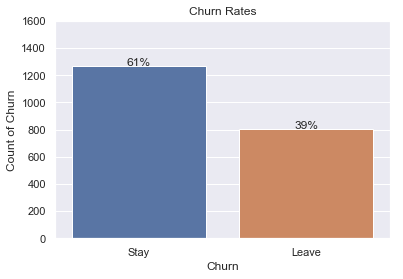

In [156]:
g1 = sns.countplot(data=merged, x='Churn', order=merged.Churn.value_counts().index)
plt.title('Churn Rates')
plt.ylabel('Count of Churn')
plt.ylim(0, 1600)
#Add percentages to the graph
total = float(len(merged)) #one person per row
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{0:.0%}'.format(height/total),
            ha="center") 
plt.show()


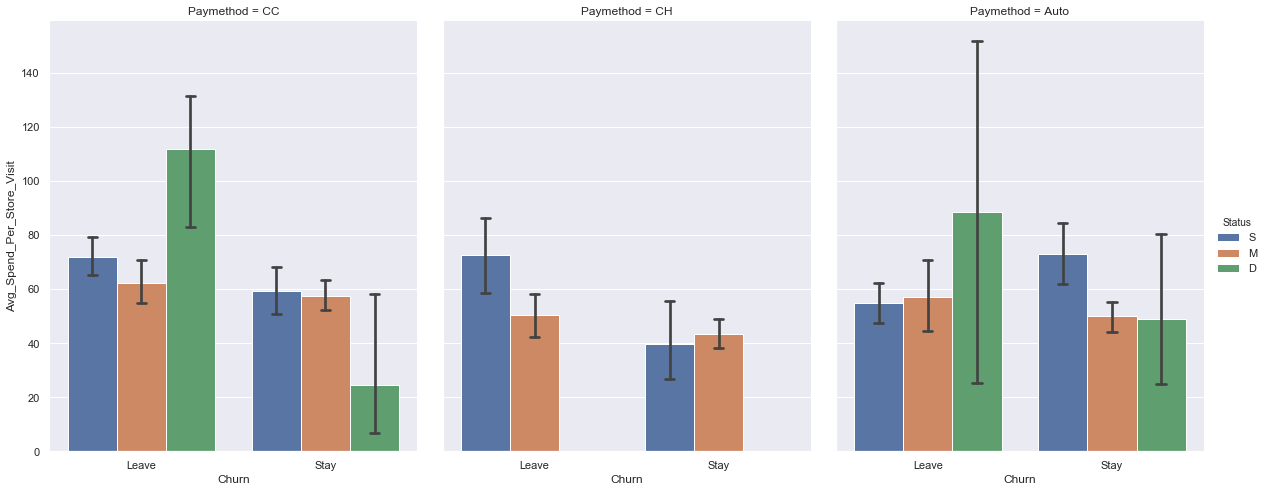

In [157]:
sns.catplot(x="Churn", y="Avg_Spend_Per_Store_Visit",
                 hue="Status", col="Paymethod",
                 data=merged, kind="bar",
                 height=7, aspect=.81,capsize=.05);

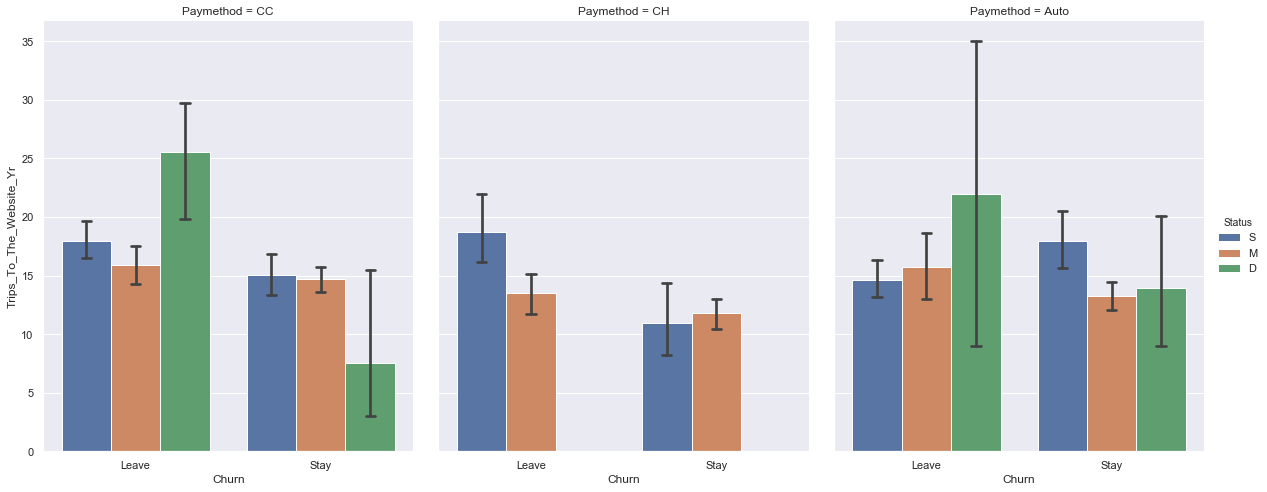

In [158]:
sns.catplot(x="Churn", y="Trips_To_The_Website_Yr",
                 hue="Status", col="Paymethod",
                 data=merged, kind="bar",
                 height=7, aspect=.81,capsize=.05);

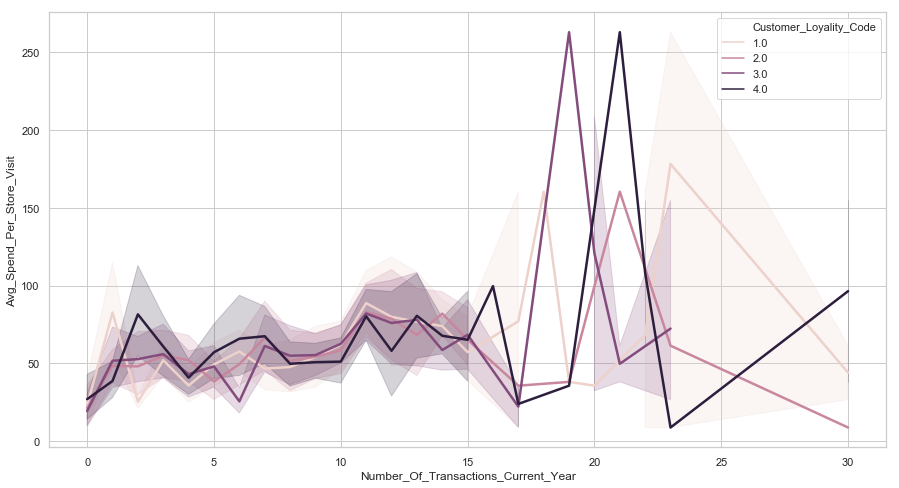

In [159]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
g = sns.lineplot(x="Number_Of_Transactions_Current_Year", y="Avg_Spend_Per_Store_Visit", hue="Customer_Loyality_Code",data=merged, linewidth=2.5)


## Step 4: Build the Predictive Model - Random Forest from Sci-kit Learn

In [160]:
# Only need to run this once within your environment

!pip install sklearn-pandas

In [161]:
# Import the required scikit-learn libraries

import sklearn
import warnings
import numpy as np
import urllib3, requests, json

from scipy.stats import chi2_contingency,ttest_ind
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_curve, roc_auc_score

warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

In [162]:
# Convert the VarChar columns to numeric columns

le = LabelEncoder()
merged.loc[:,'Churn']= le.fit_transform(merged.loc[:,'Churn'])
merged.head()

,ID,Sex,Region,Children,Est_Income,AgeGroup,Car_Owner,Status,Paymethod,LocalBilltype,Customer_Segments,Trips_To_The_Website_Yr,Avg_Spend_Per_Store_Visit,Customer_Loyality_Code,Number_Of_Transactions_Current_Year,Churn
0,1.0,F,2.0,1.0,38000.00,1.0,N,S,CC,Budget,High Income Families,46.0,206.08,3.0,12.0,0
1,6.0,M,3.0,2.0,29616.00,3.0,N,M,CH,FreeLocal,Low Value and No Kids,15.0,45.50,2.0,15.0,1
2,8.0,M,1.0,0.0,19732.80,3.0,N,M,CC,FreeLocal,High Income Families,9.0,22.44,3.0,12.0,1
3,11.0,M,3.0,2.0,96.33,4.0,N,S,CC,Budget,High Income Families,12.0,32.88,1.0,13.0,1
4,14.0,F,3.0,2.0,52004.80,1.0,N,M,CH,Budget,Low Value and No Kids,6.0,23.11,1.0,3.0,0


In [163]:
# Check the values for Churn

merged.groupby(['Churn']).size()

Churn
0     804
1    1266
dtype: int64

In [164]:
# define the label (Target Field) and features

y = np.float32(merged.Churn)
x = merged.drop(['Churn','ID'], axis = 1)

In [165]:
# List the fields used as inputs (features) to predict churn with

list(x)

['Sex',
 'Region',
 'Children',
 'Est_Income',
 'AgeGroup',
 'Car_Owner',
 'Status',
 'Paymethod',
 'LocalBilltype',
 'Customer_Segments',
 'Trips_To_The_Website_Yr',
 'Avg_Spend_Per_Store_Visit',
 'Customer_Loyality_Code',
 'Number_Of_Transactions_Current_Year']

In [166]:
# Apply the LabelEncoder to encode the input features in numeric form where applicable

from sklearn_pandas import DataFrameMapper
mapper = DataFrameMapper([
     ('Sex', LabelEncoder()),
     ('Region', LabelEncoder()),
     ('Children',None),
     ('Est_Income',None),
     ('AgeGroup', LabelEncoder()),    
     ('Car_Owner', LabelEncoder()),
     ('Status', LabelEncoder()),
     ('Paymethod', LabelEncoder()),
     ('LocalBilltype', LabelEncoder()),
     ('Customer_Segments', LabelEncoder()),
     ('Trips_To_The_Website_Yr',None),
     ('Avg_Spend_Per_Store_Visit',None),
     ('Customer_Loyality_Code',LabelEncoder()),
     ('Number_Of_Transactions_Current_Year',None)
    ])

In [167]:
# split the data to training and testing set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [168]:
# fit the model

import sklearn.pipeline
from sklearn.preprocessing import OneHotEncoder

random_forest = RandomForestClassifier()
steps = [('mapper', mapper),('RandonForestClassifier', random_forest)]
pipeline = sklearn.pipeline.Pipeline(steps)
model=pipeline.fit( x_train, y_train )
model

Pipeline(memory=None,
     steps=[('mapper', DataFrameMapper(default=False, df_out=False,
        features=[('Sex', LabelEncoder()), ('Region', LabelEncoder()), ('Children', None), ('Est_Income', None), ('AgeGroup', LabelEncoder()), ('Car_Owner', LabelEncoder()), ('Status', LabelEncoder()), ('Paymethod', LabelEncoder()), ('Lo...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

## Step 5: Evaluate The Model

In [169]:
# call pipeline.predict() on your x_test data to make a set of test predictions which are written to series y_prediction

y_prediction = pipeline.predict(x_test)
y_probability = pipeline.predict_proba(x_test)

# Evaluate the model using sklearn.classification_report()
report = sklearn.metrics.classification_report(y_test, y_prediction )
accuracy = sklearn.metrics.accuracy_score(y_test, y_prediction )
print(report)
print("Overall Model Accuracy: " + str(accuracy))

              precision    recall  f1-score   support

         0.0       0.88      0.83      0.85       161
         1.0       0.89      0.93      0.91       253

   micro avg       0.89      0.89      0.89       414
   macro avg       0.89      0.88      0.88       414
weighted avg       0.89      0.89      0.89       414

Overall Model Accuracy: 0.8888888888888888


In [170]:
# Reset the index on the x_train data so that the join will match record by record and not require a key
x_test.reset_index(drop=True, inplace=True)

#Write the Actual and Predicted Mortgage Default values in to dataframes 
y_test_df = pd.DataFrame(y_test,columns=['Churn'])
y_pred_df = pd.DataFrame(y_prediction,columns=['Pred Churn'])
y_prob_df = pd.DataFrame(y_probability,columns=['Prob Non-Churn','Prob Churn'])

# Combine the three dataframes by index value rather than key field
scored_df = pd.concat([x_test, y_test_df, y_pred_df, y_prob_df], axis=1)
scored_df.head()


,Sex,Region,Children,Est_Income,AgeGroup,Car_Owner,Status,Paymethod,LocalBilltype,Customer_Segments,Trips_To_The_Website_Yr,Avg_Spend_Per_Store_Visit,Customer_Loyality_Code,Number_Of_Transactions_Current_Year,Churn,Pred Churn,Prob Non-Churn,Prob Churn
0,F,1.0,0.0,98716.30,4.0,N,S,CC,FreeLocal,High Income Families,9.0,13.92,4.0,10.0,0.0,0.0,1.000000,0.000000
1,M,1.0,0.0,5745.00,1.0,Y,M,CC,FreeLocal,High Income Families,9.0,17.71,2.0,13.0,0.0,0.0,1.000000,0.000000
2,M,2.0,1.0,5252.29,1.0,N,M,Auto,Budget,Married No Kids,4.0,17.08,2.0,1.0,1.0,1.0,0.200000,0.800000
3,F,3.0,2.0,11251.10,3.0,Y,S,CC,FreeLocal,High Income Families,28.0,113.48,2.0,14.0,0.0,0.0,1.000000,0.000000
4,F,1.0,0.0,15989.30,4.0,N,S,CC,Budget,High Income Families,6.0,25.49,3.0,2.0,0.0,0.0,0.735833,0.264167


In [171]:
# Display a table showing the feature importance for each of the input fields

feature_imp = pd.DataFrame(random_forest.feature_importances_, index = x_test.columns,columns=['Importance']).sort_values('Importance',ascending=False)
feature_imp['Feature'] = feature_imp.index
feature_imp.reset_index(drop=True)
feature_imp.head(15)

,Importance,Feature
Est_Income,0.162925,Est_Income
Number_Of_Transactions_Current_Year,0.109427,Number_Of_Transactions_Current_Year
Avg_Spend_Per_Store_Visit,0.104241,Avg_Spend_Per_Store_Visit
Customer_Loyality_Code,0.101616,Customer_Loyality_Code
Region,0.091490,Region
AgeGroup,0.080823,AgeGroup
Trips_To_The_Website_Yr,0.079285,Trips_To_The_Website_Yr
Status,0.078954,Status
Sex,0.055633,Sex
Paymethod,0.035113,Paymethod


Text(0.5, 1.0, 'Mortgage Default - Feature Importance')

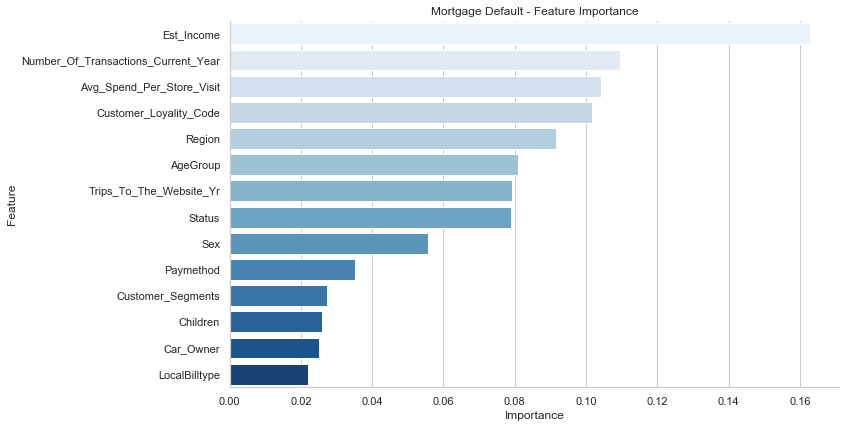

In [172]:
# Display the feature importance as a visualisation

sns.factorplot(y="Feature",x="Importance", data=feature_imp,kind="bar",palette="Blues",size=6,aspect=2)
plt.title('Mortgage Default - Feature Importance')

## Step 6: Save the Model to WML Server

#### <font color=red>Note: This code was written without access to a working WML Server, therefore requires validation but is based upon published documentation!<font>

In [173]:
!pip install --upgrade watson-machine-learning-client-V4

from watson_machine_learning_client import WatsonMachineLearningAPIClient

  Using cached https://files.pythonhosted.org/packages/5b/85/d1ae875e6a2247bf40f1da183dca698415e6fa42fa002a4d8ef7142df0cf/watson_machine_learning_client_V4-1.0.60-py3-none-any.whl
  Found existing installation: watson-machine-learning-client-V4 1.0.58
    Uninstalling watson-machine-learning-client-V4-1.0.58:


Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\watsonstudiodesktop\\miniconda3\\envs\\desktop\\lib\\site-packages\\watson_machine_learning_client\\assets.py'
Consider using the `--user` option or check the permissions.



In [174]:
# Input the WML Server credentials that were shared by your lab instructor

 wml_credentials = {
   "instance_id": "wml_local",
   "url" : "https://rhserv.ibm.demo:31843",
   "username":"admin",
   "password": "password",
   "version": "1.1"
}

In [175]:
#Save the credentials to the variable clients:

client = WatsonMachineLearningAPIClient(wml_credentials)

In [176]:
# Obtain the UId of your space

def guid_from_space_name(client, space_name):
     instance_details = client.service_instance.get_details()
     space = client.spaces.get_details()
     return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['guid'])

<b>Action:</b> Enter the name of your deployment space in the code below: space_uid = guid_from_space_name(client, 'YOUR DEPLOYMENT SPACE').

In [177]:
# Enter the name of your deployment space here:

space_uid = guid_from_space_name(client, 'Churn Prediction Space')
print("Space UID = " + space_uid)

Space UID = 6a083009-6a18-4907-ae2e-aeb6bbbcd6eb


In [178]:
client.set.default_space(space_uid)

'SUCCESS'

# Model Metadata.



In [179]:
# Model Metadata.

meta_props={
    client.repository.ModelMetaNames.NAME: "Churn Prediction Model - SKLearn",
    client.repository.ModelMetaNames.RUNTIME_UID: "scikit-learn_0.20-py3.6",
    client.repository.ModelMetaNames.TYPE: "scikit-learn_0.20"
}

Save the churn model, along with the associated meta-data

In [180]:
# Create the model artifact.
model_artifact = client.repository.store_model(model,
                                                   meta_props=meta_props,
                                                   training_data=x_train,
                                                   training_target=y_train)

## Step 7: Deploy the Model

As with Watson Studio and Watson Machine Learning within Cloud Pak for Data, it is possible to create the model deployments from within the notebook itself. <br>
In this lab, the above code has saved the model to the WML Server and the model can be deployed manually via the GUI